# Imports

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import re

# Avoid too many decimal places on Pandas output
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Auxiliary functions

In [18]:
def print_correlations(df):
    rho = df.corr()
    pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
    p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
    print(rho.round(2).astype(str) + p)
    
def plot_correlations(df): 
    corr = df.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0, len(df.columns), 1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(df.columns)
    ax.set_yticklabels(df.columns)
    plt.show()

# Load data

In [19]:
evaluation_path = './experiments/evaluation_error_stable.csv'

# Remove special characters output if they are present
string = open(evaluation_path).read()
new_str = re.sub('\[m', '', string)
open(evaluation_path, 'w').write(new_str)

40882

In [20]:
df = pd.read_csv(evaluation_path)

# Remove columns unnecessary for the analysis
df2 = df.drop(columns=['model', 'smooth_v', 'inner', 'run'])
df2.head()

,mean_error,last_error,n-links,alpha,inner_epsilon,rehu
0,13223.76774,16382.97897,8,0.00010,0.20000,0.00050
1,43904.14910,83817.34390,8,0.00010,0.01000,0.00050
2,6863.59554,10042.53480,8,0.00010,0.00500,0.00050
3,9318.50523,21328.84341,8,0.00010,0.00100,0.00050
4,2671.31691,3360.66257,8,0.00010,0.00050,0.00050


# Evaluation analysis

## Mean error by hyperparameters configuration

In [30]:
df2.groupby(by=['n-links', 'alpha', 'inner_epsilon', 'rehu']) \
    .agg(mean_error=('mean_error', 'mean'), runs_count=('last_error', 'size')) \
    .sort_values(by=['n-links', 'mean_error']) \
    .query('`n-links`==2')

mean_error  runs_count
n-links alpha   inner_epsilon rehu                            
2       0.00100 0.01000       0.00050    168.86928           7
                0.00100       0.00500    346.45875           6
        0.00010 0.00100       0.00500    618.07236           5
                0.00500       0.00500    725.83331           6
        0.00100 0.00100       0.00100   3184.74752           6
        0.00010 0.00500       0.00100   4775.51660           6
        0.00005 0.20000       0.00050   5901.24338           5
        0.00010 0.00050       0.00050   6115.86219           5
                0.01000       0.00050   6744.64419          11
                0.00010       0.00050   8116.96515           5
        0.00005 0.00050       0.00050   8876.59616           5
        0.00010 0.20000       0.00050   9286.64429           5
                0.10000       0.00500   9963.84236           8
                0.05000       0.00500  11517.57052           8
                0.00100       0.00050  13256.23287          10
                0.00500       0.00050  13443.92166          11
        0.00100 0.00100       0.00050  14984.29052           6
        0.00005 0.00500       0.00050  15924.70978           5
        0.00010 0.01000       0.00500  19096.46165          14
        0.00100 0.01000       0.00500  20053.34954           7
        0.00005 0.01000       0.00050  24856.59456           5
        0.00010 0.01000       0.00100  24903.17183           6
        0.00005 0.00100       0.00050  35358.09668           5
        0.00100 0.01000       0.00100  41381.53406           7
                0.00500       0.00500  45903.43611           6
        0.00005 0.00010       0.00050  52416.78325           5
        0.00010 0.00100       0.00100  62006.97425           5
        0.00100 0.00500       0.00100  63732.93826           6
                              0.00050 215689.91548           6

## Minimum mean_error by hyperparameter configuration

In [29]:
df_min = df2.groupby(by=['n-links', 'alpha', 'inner_epsilon', 'rehu']).min().sort_values(by=['mean_error'])
df_min.query('`n-links`==2')

mean_error   last_error
n-links alpha   inner_epsilon rehu                             
2       0.00010 0.01000       0.00050    112.44081     24.20345
        0.00005 0.01000       0.00050    125.57936     38.00225
                0.00050       0.00050    155.72550     67.23885
        0.00010 0.05000       0.00500    159.64444     72.43086
        0.00100 0.01000       0.00050    168.86928     52.18528
        0.00010 0.00010       0.00050    225.51472     20.63603
                0.00500       0.00050    270.65768     33.84720
                0.00050       0.00050    314.60934    225.04498
        0.00100 0.00100       0.00500    346.45875    295.50883
        0.00010 0.10000       0.00500    570.91762    529.06966
                0.01000       0.00500    576.31256    534.24779
                0.00100       0.00500    618.07236    548.15617
                0.00500       0.00500    725.83331    865.68312
        0.00005 0.20000       0.00050    838.00009    995.33835
        0.00010 0.00100       0.00050    986.44258   2190.91906
        0.00005 0.00500       0.00050   1115.72930   1443.41769
        0.00010 0.20000       0.00050   1385.09984   1985.81727
        0.00100 0.00100       0.00100   3184.74752   4463.43683
        0.00005 0.00100       0.00050   3973.88991   6169.94650
        0.00010 0.00500       0.00100   4775.51660   6256.75711
        0.00005 0.00010       0.00050   7608.13094  14897.38001
        0.00100 0.00100       0.00050  14984.29052  23468.87290
                0.01000       0.00500  20053.34954  23109.70107
        0.00010 0.01000       0.00100  24903.17183  36190.73138
        0.00100 0.01000       0.00100  41381.53406  58001.70992
                0.00500       0.00500  45903.43611  63864.73815
        0.00010 0.00100       0.00100  62006.97425  90350.26797
        0.00100 0.00500       0.00100  63732.93826  75517.47797
                              0.00050 215689.91548 390723.50113

In [23]:
# Look at specific hyperparameter combinations
df2.query('alpha==0.00010 & inner_epsilon==0.20000')

,mean_error,last_error,n-links,alpha,inner_epsilon,rehu
0,13223.76774,16382.97897,8,0.00010,0.20000,0.00050
12,8230.96659,11182.98096,8,0.00010,0.20000,0.00050
24,9655.88796,14516.05977,8,0.00010,0.20000,0.00050
36,3752.24999,4664.11420,8,0.00010,0.20000,0.00050
48,7069.86363,11580.30266,8,0.00010,0.20000,0.00050
60,10398.40851,14432.96120,8,0.00010,0.20000,0.00050
72,8730.22950,10166.41118,8,0.00010,0.20000,0.00050
84,9447.73639,15755.51087,8,0.00010,0.20000,0.00050
96,5666.69893,8992.45538,8,0.00010,0.20000,0.00050
108,8266.51647,11742.41221,8,0.00010,0.20000,0.00050


## Correlation between variables in the dataset

In [24]:
print_correlations(df2)

              mean_error last_error   n-links     alpha inner_epsilon   
mean_error        1.0***    0.99***      0.06     -0.02         -0.03  \
last_error       0.99***     1.0***      0.06     -0.02         -0.03   
n-links             0.06       0.06    1.0***  -0.46***       0.19***   
alpha              -0.02      -0.02  -0.46***    1.0***      -0.18***   
inner_epsilon      -0.03      -0.03   0.19***  -0.18***        1.0***   
rehu               -0.04      -0.03  -0.16***    0.13**          0.04   

                   rehu  
mean_error        -0.04  
last_error        -0.03  
n-links        -0.16***  
alpha            0.13**  
inner_epsilon      0.04  
rehu             1.0***  


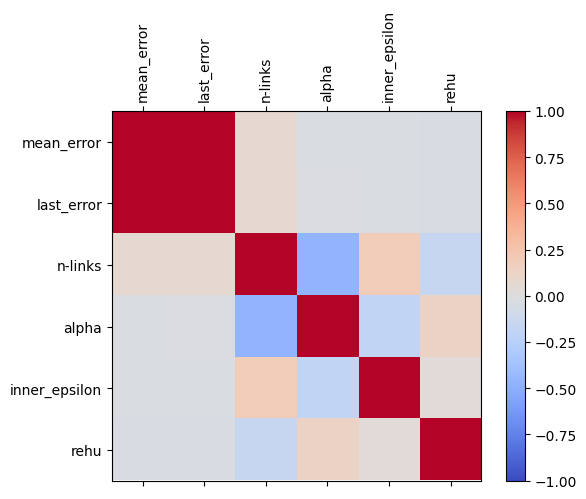

In [25]:
plot_correlations(df2)